In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
pre_image = img.imread('../../../dataset/train/images/hurricane-michael_00000001_pre_disaster.png')
post_image = img.imread('../../../dataset/train/images/hurricane-michael_00000001_post_disaster.png')

In [3]:
pre_target = img.imread('../../../dataset/train/targets/hurricane-michael_00000001_pre_disaster_target.png')
post_target = img.imread('../../../dataset/train/targets/hurricane-michael_00000001_post_disaster_target.png')

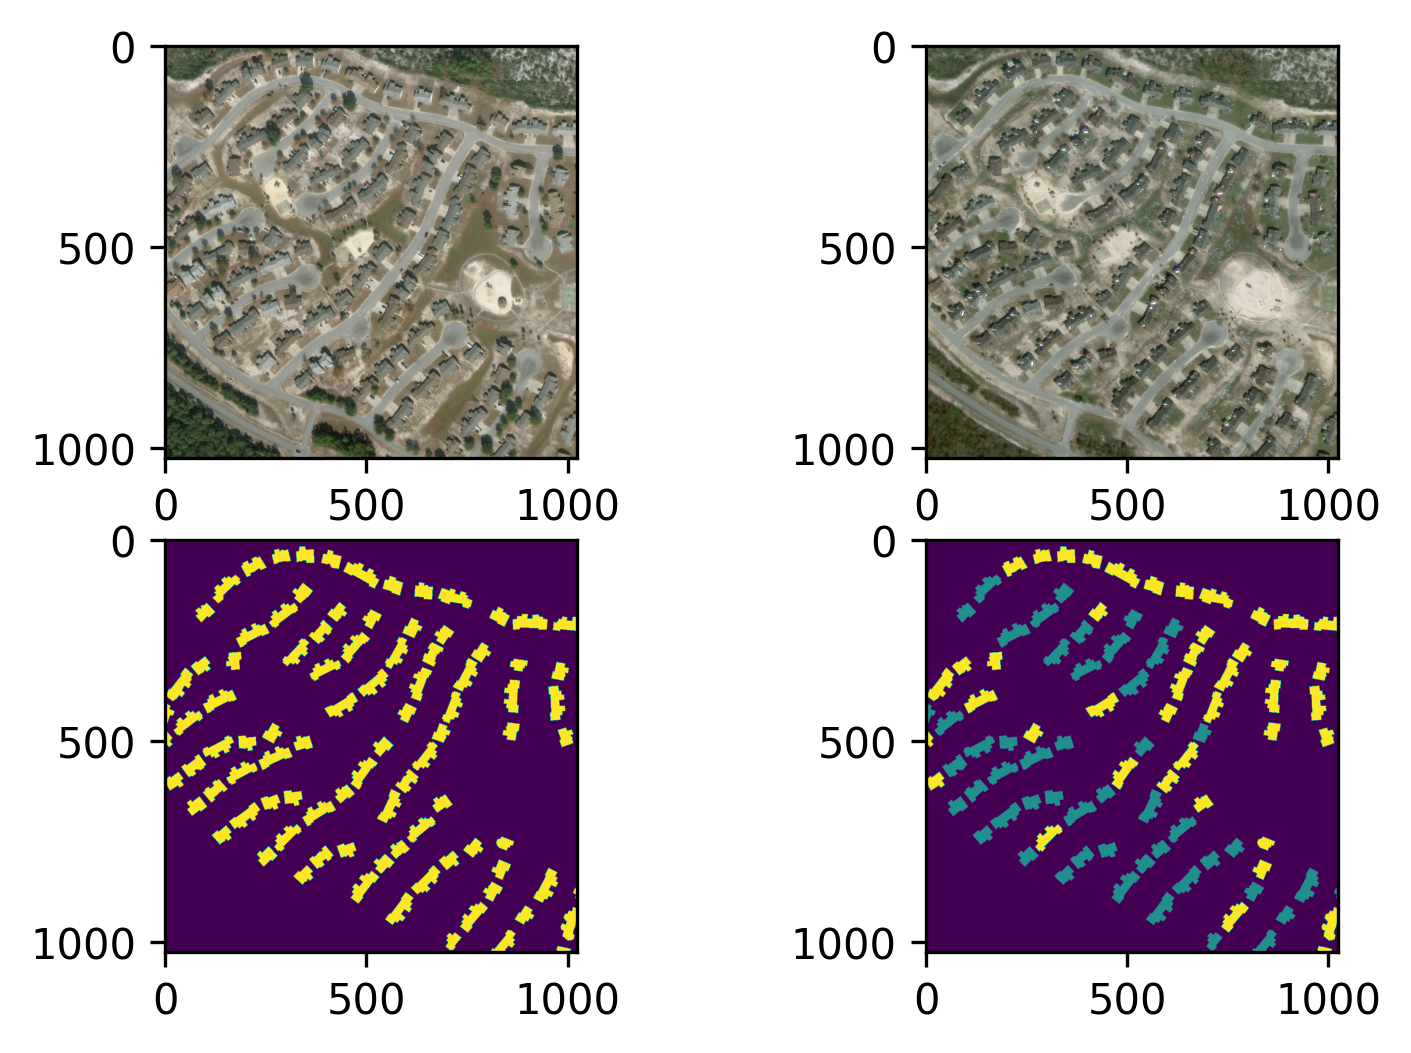

In [4]:
fig, ax = plt.subplots(2, 2)
fig.set_dpi(300)

ax[0, 0].imshow(pre_image)
ax[1, 0].imshow(pre_target)
ax[0, 1].imshow(post_image)
ax[1, 1].imshow(post_target)

In [5]:
import json
import shapely.wkt

with open('../../../dataset/train/labels/hurricane-michael_00000001_post_disaster.json') as file:
    post_data = json.load(file)

with open('../../../dataset/train/labels/hurricane-michael_00000001_pre_disaster.json') as file:
    pre_data = json.load(file)

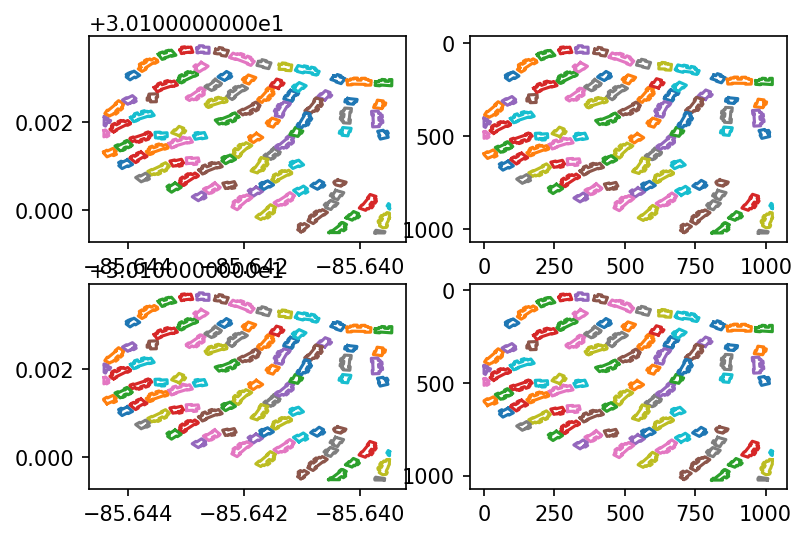

In [6]:
fig, ax = plt.subplots(2, 2)
fig.set_dpi(150)

for item in post_data['features']['lng_lat']:
    mask = shapely.wkt.loads(item['wkt'])
    ax[0, 0].plot(*mask.exterior.xy)

ax[0, 1].invert_yaxis()
for item in post_data['features']['xy']:
    mask = shapely.wkt.loads(item['wkt'])
    ax[0, 1].plot(*mask.exterior.xy)

for item in pre_data['features']['lng_lat']:
    mask = shapely.wkt.loads(item['wkt'])
    ax[1, 0].plot(*mask.exterior.xy)

ax[1, 1].invert_yaxis()
for item in pre_data['features']['xy']:
    mask = shapely.wkt.loads(item['wkt'])
    ax[1, 1].plot(*mask.exterior.xy)

In [25]:
import pandas as pd

In [26]:
dataset = pd.read_csv('../../../dataset/XBD_train/train.csv')
dataset.drop('Unnamed: 0', inplace=True, axis=1)
dataset.head()

,uuid,labels
0,486b0813-ecd2-4b84-856c-9c0e42156953.png,0
1,139cf2c8-ad52-4739-82b5-bb646b215e76.png,0
2,d43deb4a-529c-4df4-b666-26dd5b17e040.png,0
3,563b145d-732d-4eb4-8c77-380519842324.png,0
4,56f51b26-d511-461d-bb31-747901a4ea75.png,0


In [27]:
dataset.shape

(162787, 2)

In [28]:
freq = dataset.groupby('labels').count()
freq

,uuid
labels,
0,120419
1,14980
2,14161
3,13227


In [29]:
df = dataset.drop(dataset[dataset['labels']==0].sample(105419).index)
print(df.shape)
df.head()

(57368, 2)


,uuid,labels
0,486b0813-ecd2-4b84-856c-9c0e42156953.png,0
1,139cf2c8-ad52-4739-82b5-bb646b215e76.png,0
4,56f51b26-d511-461d-bb31-747901a4ea75.png,0
10,c1cfa9b6-899e-46f5-8133-82cad43a6a2f.png,1
11,f079cd79-cff9-4635-ab9e-6e1ba43248fa.png,1


In [30]:
df.groupby('labels').count()

,uuid
labels,
0,15000
1,14980
2,14161
3,13227
